# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Analyzing-my-SMS-history-with-Python" data-toc-modified-id="Analyzing-my-SMS-history-with-Python-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyzing my SMS history with Python</a></div><div class="lev2 toc-item"><a href="#Plot-settinsg" data-toc-modified-id="Plot-settinsg-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Plot settinsg</a></div><div class="lev2 toc-item"><a href="#Accessing-the-data" data-toc-modified-id="Accessing-the-data-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Accessing the data</a></div><div class="lev2 toc-item"><a href="#Parsing-the-data" data-toc-modified-id="Parsing-the-data-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Parsing the data</a></div><div class="lev2 toc-item"><a href="#Convert-to-a-dictionary" data-toc-modified-id="Convert-to-a-dictionary-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Convert to a dictionary</a></div><div class="lev2 toc-item"><a href="#Some-information-about-this-dataset" data-toc-modified-id="Some-information-about-this-dataset-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Some information about this dataset</a></div><div class="lev2 toc-item"><a href="#Convert-to-a-Panda-DataFrame" data-toc-modified-id="Convert-to-a-Panda-DataFrame-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Convert to a Panda DataFrame</a></div><div class="lev2 toc-item"><a href="#Group-by" data-toc-modified-id="Group-by-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Group by</a></div><div class="lev3 toc-item"><a href="#Q1.-Who-are-the-10-people-who-text-me-the-most?-The-10-people-I-text-the-most?-Why-is-there-a-difference?" data-toc-modified-id="Q1.-Who-are-the-10-people-who-text-me-the-most?-The-10-people-I-text-the-most?-Why-is-there-a-difference?-171"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Q1. Who are the 10 people who text me the most? The 10 people I text the most? Why is there a difference?</a></div><div class="lev3 toc-item"><a href="#Q2.-What-is-the-mean,-min,-max-and-mean±std-length-of-a-text-message?" data-toc-modified-id="Q2.-What-is-the-mean,-min,-max-and-mean±std-length-of-a-text-message?-172"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Q2. What is the mean, min, max and mean±std length of a text message?</a></div><div class="lev3 toc-item"><a href="#Q3.-Mean,-min,-max-number-of-text-message-everyday?" data-toc-modified-id="Q3.-Mean,-min,-max-number-of-text-message-everyday?-173"><span class="toc-item-num">1.7.3&nbsp;&nbsp;</span>Q3. Mean, min, max number of text message everyday?</a></div><div class="lev3 toc-item"><a href="#Q5.-Is-there-a-day-in-the-week-(or-a-month-in-the-year)-where-I-receive-more-text-messages?-And-an-hour-in-the-day?" data-toc-modified-id="Q5.-Is-there-a-day-in-the-week-(or-a-month-in-the-year)-where-I-receive-more-text-messages?-And-an-hour-in-the-day?-174"><span class="toc-item-num">1.7.4&nbsp;&nbsp;</span>Q5. Is there a day in the week (or a month in the year) where I receive more text messages? And an hour in the day?</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Conclusion</a></div>

# Analyzing my SMS history with Python

This small notebook is a demonstration of what you can do with:

- A backup application for your smartphone, e.g., [Super Backup](https://play.google.com/store/apps/details?id=com.idea.backup.smscontacts) (completely free),
- The [Python](https://www.python.org) programming language,
- And some smart-ass-ery.

## Plot settinsg

In [1]:
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="hls", font="sans-serif", font_scale=1.6)

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8*16/9, 8)

## Accessing the data

This is very specific to where your data is stored.

In [2]:
from pathlib import Path
root = Path('..')
dataroot = root / 'data' / 'raw'
!ls -larth $dataroot

total 32K
drwxr-xr-x 2 lilian lilian 4,0K févr.  6  2016 wakatime
drwxr-xr-x 2 lilian lilian 4,0K nov.   2  2016 free
drwxr-xr-x 3 lilian lilian 4,0K févr.  4  2017 ..
drwxr-xr-x 2 lilian lilian 4,0K janv. 23 18:11 sms
drwxr-xr-x 2 lilian lilian 4,0K janv. 23 18:11 contacts
drwxr-xr-x 2 lilian lilian 4,0K janv. 23 18:11 calllogs
drwxr-xr-x 2 lilian lilian 4,0K janv. 23 18:11 cal
drwxr-xr-x 8 lilian lilian 4,0K janv. 23 18:11 .


In [3]:
smsdata = dataroot / 'sms'
!ls -larth $smsdata

total 4,4M
drwxr-xr-x 2 lilian lilian 4,0K janv. 23 18:11 .
-rw-r--r-- 1 lilian lilian 4,4M janv. 23 18:11 sms_20180123173716.xml
drwxr-xr-x 8 lilian lilian 4,0K janv. 23 18:11 ..


In [4]:
xml_filenames = !ls $smsdata
a_xml_filename = smsdata / xml_filenames[0]
!ls $a_xml_filename
!wc $a_xml_filename

../data/raw/sms/sms_20180123173716.xml
  34982  574979 4567077 ../data/raw/sms/sms_20180123173716.xml


Let's see the latest text message I received:

In [5]:
!head -n3 $a_xml_filename

<?xml version="1.0" encoding="UTF-8"?>
<allsms count="17398">
	<sms address="+33669612536" time="23 janv. 2018 17:34:08" date="1516725248997" type="1" body="Si tu veux :)" read="1" service_center="+33695000660" name="" />


In [6]:
str(a_xml_filename)

'../data/raw/sms/sms_20180123173716.xml'

## Parsing the data

As [suggested in this StackOverflow](https://stackoverflow.com/a/1912516/) answer, [I will use `minidom`](https://docs.python.org/3/library/xml.dom.minidom.html).

In [7]:
from xml.dom import minidom

In [8]:
xmldoc = minidom.parse(str(a_xml_filename))

In [9]:
sms_list = xmldoc.getElementsByTagName('sms')
len(sms_list)

17398

There is about $17000$ text messages in this file.

## Convert to a dictionary

In [10]:
def sms_to_dict(sms):
    return dict(sms.attributes.items())

In [11]:
all_dicts = [sms_to_dict(sms) for sms in sms_list]

The following keys are stored for each messages:

In [12]:
attributes = list(all_dicts[0].keys())
attributes

['address', 'time', 'date', 'type', 'body', 'read', 'service_center', 'name']

This data structure is basic, and does not cost too much memory.

In [13]:
from sys import getsizeof
getsizeof(all_dicts)

140584

## Some information about this dataset

- What is the timespan?

In [14]:
latest = all_dicts[0]
first = all_dicts[-1]

print(f"This dataset spans between '{first['time']}' and '{latest['time']}'")

This dataset spans between '28 mars 2016 19:46:12' and '23 janv. 2018 17:34:08'


In [15]:
from datetime import date, timedelta
from dateutil.parser import parse

In [16]:
span = date.fromtimestamp(int(latest['date'])/1000) - date.fromtimestamp(int(first['date'])/1000)
span_days = span.days
print(f"This dataset spans on {span_days} days")

This dataset spans on 666 days


> This was not intentional!

- All text messages have the same attributes? If it is the case, it will be very easy to convert all this to a [panda DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame).

In [17]:
sum( not hasattr(sms, a) for a in attributes for sms in all_dicts)

139184

In [18]:
for a in attributes:
    dont_have_it = sum( a not in sms for sms in all_dicts)
    print(f"For attribute {a:>14}, {dont_have_it:>5} messages do not have it.")

For attribute        address,     0 messages do not have it.
For attribute           time,     0 messages do not have it.
For attribute           date,     0 messages do not have it.
For attribute           type,     0 messages do not have it.
For attribute           body,     0 messages do not have it.
For attribute           read,     0 messages do not have it.
For attribute service_center,     0 messages do not have it.
For attribute           name,     0 messages do not have it.


## Convert to a Panda DataFrame

In [19]:
import numpy as np
import pandas as pd

Behold the magic!

In [20]:
df = pd.DataFrame(all_dicts)

Let's clean up, first by using only the initials, like "LB" instead of Lilian Besson.

> *Why?* I want to preserve the privacy of my contacts!

In [21]:
def only_initials(s):
    if len(s) == 0: return s
    parts = s.split(" ")
    if len(parts) <= 1:
        return s[:2]
    else:
        return parts[0][:1] + parts[1][:1]

In [22]:
df.name = df.name.apply(only_initials)

Then by cleaning up phone numbers. I want to remove the spaces, the '+' in the country code, and hide the last 3 digits to preserve the privacy of my contacts.

In [23]:
def cleanup_phonenumber(address):
    address = address.replace(' ', '')
    address = address.replace('+33', '0')
    return address[:-3] + 'XXX'

Tests:

In [24]:
cleanup_phonenumber('0612121212')
cleanup_phonenumber('06 12 12 12 12')
cleanup_phonenumber('06 121 212 12')
cleanup_phonenumber('+33612121212')

'0612121XXX'

'0612121XXX'

'0612121XXX'

'0612121XXX'

In [25]:
df.address = df.address.apply(cleanup_phonenumber)

Let's check:

In [26]:
df[:2]

address                body           date name read service_center  \
0  0669612XXX       Si tu veux :)  1516725248997         1   +33695000660   
1  0669612XXX  Jeudi soir sinon ?  1516723690247         1                  

                     time type  
0  23 janv. 2018 17:34:08    1  
1  23 janv. 2018 17:08:10    2

Some information:

- Memory?

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17398 entries, 0 to 17397
Data columns (total 8 columns):
address           17398 non-null object
body              17398 non-null object
date              17398 non-null object
name              17398 non-null object
read              17398 non-null object
service_center    17398 non-null object
time              17398 non-null object
type              17398 non-null object
dtypes: object(8)
memory usage: 1.1+ MB


- What is this `type` attribute? It is `1` for the received sms and `2` for the sent sms.

In [28]:
set(list(df.type))

{'1', '2'}

In [29]:
received = df[df.type == '1']
sent = df[df.type == '2']

In [30]:
received[:1]
sent[:1]

address           body           date name read service_center  \
0  0669612XXX  Si tu veux :)  1516725248997         1   +33695000660   

                     time type  
0  23 janv. 2018 17:34:08    1

address                body           date name read service_center  \
1  0669612XXX  Jeudi soir sinon ?  1516723690247         1                  

                     time type  
1  23 janv. 2018 17:08:10    2

- I send more messages than I receive, about $30\%$ more!

In [31]:
len(received)
len(sent)
round(100 * ((len(sent) / len(received)) - 1))

7540

9858

31

- What is this `service_center` information? Not so sure, but we don't care. Actually, it can be used to know the countries from where I sent all these:

In [32]:
country_codes = set([s[:3] for s in set(list(df.service_center)) if s and s.startswith('+')])
country_codes

{'+31', '+33', '+41'}

> [+33 is for France](http://www.country-codes.org/33), [+41 is for Switzerland](http://www.country-codes.org/41) and [+31 is for the Netherlands](http://www.country-codes.org/31).

- Did I read all my text messages?

In [33]:
assert set(list(df.read)) == {'1'}, "Some message was not read before the backup!"

- Do they all have a non-empty body? No, but only $5$ of them, that's OK.

In [34]:
min([len(b) for b in df.body])
sum([True for b in df.body if len(b) == 0])

0

5

----
## Group by

I want to answer these statistical questions:

1. Who are the 10 people who text me the most? The 10 people I text the most? Why is there a difference?
2. What is the mean, min, max and mean±std length of a text message?
3. Mean, min, max number of text message everyday?
4. Every day, what is the distribution of received text messages on an hour basis?
5. Is there a day in the week (or a month in the year) where I receive/send more text messages?

### Q1. Who are the 10 people who text me the most? The 10 people I text the most? Why is there a difference?

First, let's check this:

In [35]:
contacts = list(set(list(df.address)))
sent_contacts = list(set(list(sent.address)))
received_contacts = list(set(list(received.address)))

In [36]:
print(f"I sent messages to {len(sent_contacts)} different people, and received from {len(received_contacts)} different people in the last {span_days} days.")

I sent messages to 133 different people, and received from 135 different people in the last 666 days.


Now, get the list of 10 people I exchanged the most text messages with:

In [37]:
df.groupby(['address']).body.count().sort_values(ascending=False)[:10]

address
0670933XXX    2421
0665137XXX    2262
0630955XXX    1664
0782815XXX    1315
0644812XXX     986
0683480XXX     850
0676361XXX     581
0671471XXX     537
0782981XXX     437
0636634XXX     401
Name: body, dtype: int64

In [38]:
exchanges = df.groupby(['address']).body.count()

Most of the people I interact is with only one message ($10\%$) or very few message ($43\%$ for less than 10 messages and $56\%$ with less than 20 messages).

In [39]:
N = len(exchanges)
N
round(100 * sum(exchanges == 1) / N)
round(100 * sum(exchanges <= 10) / N)
round(100 * sum(exchanges <= 20) / N)

144

8

34

50

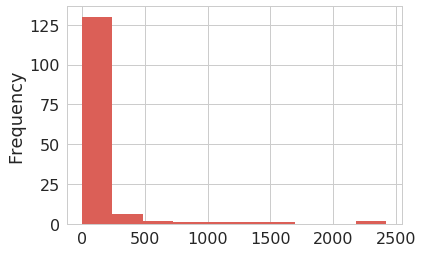

In [40]:
exchanges.plot.hist()

But most of my messages ($61\%$) are with my top-10 contacts, with who I exchange in average $1000$ messages in 2 years.
There is a huge gap between the \#1 contact ($1664$ messages) and the \#10 contact (three times less!).

In [41]:
top10 = df.groupby(['address']).body.count().sort_values(ascending=False)[:10]
round(100 * top10.sum() / len(df))
top10.describe()

66.0

count      10.000000
mean     1145.400000
std       747.513686
min       401.000000
25%       548.000000
50%       918.000000
75%      1576.750000
max      2421.000000
Name: body, dtype: float64

$76\%$ of my messages are with only $20$ people, and $90\%$ with $50$ people out of $153$.

In [42]:
top20 = df.groupby(['address']).body.count().sort_values(ascending=False)[:20]
round(100 * top20.sum() / len(df))
top20.mean()

79.0

687.6

In [43]:
top50 = df.groupby(['address']).body.count().sort_values(ascending=False)[:50]
round(100 * top50.sum() / len(df))
top50.mean()

93.0

324.7

Not so useful, I would like to have their name:

In [44]:
top20 = df.groupby(['address', 'name']).body.count().sort_values(ascending=False)[:20]
top20

address     name
0670933XXX  PB      2421
0665137XXX          2262
0630955XXX  AF      1664
0782815XXX  HJ      1315
0644812XXX  FB       986
0683480XXX  LS       850
0676361XXX           581
0671471XXX  CA       537
0782981XXX  FB       437
0636634XXX  SC       401
0626178XXX  AV       383
0669612XXX           304
0661064XXX  JG       268
0633837XXX           256
0633508XXX           213
0637105XXX  CB       203
0674797XXX           195
0629453XXX  GR       169
0675030XXX           154
0675405XXX  TG       153
Name: body, dtype: int64

Note that some names are missing, so it was wise to keep the phone numbers also.

In [45]:
df.groupby(['name']).body.count().sort_values(ascending=False)[:10]

name
      5233
PB    2421
AF    1664
FB    1423
HJ    1315
LS     850
CA     537
SC     401
AV     383
MP     364
Name: body, dtype: int64

I can take some interesting conclusions:

- \#1 contact is my best friend PB,
- \#2 is my parents,
- \#3 is my friend AF,
- \#4 is my friend HJ,
- \#5 is my brother FB,
- \#6 is my friend LS,
- and the next ones are my friends A, C, my other brother F, my friends S, M, J, A, C and G.

Interesting to notice that two of these top-20 contacts are "recent friends" that I met in 2017.

### Q2. What is the mean, min, max and mean±std length of a text message?

In [46]:
import matplotlib.pyplot as plt

In [47]:
lengths = pd.Series([len(b) for b in df.body])

sent_lengths = pd.Series([len(b) for b in sent.body])

received_lengths = pd.Series([len(b) for b in received.body])

In [48]:
lengths.describe()

count    17398.000000
mean       103.863088
std         94.575303
min          0.000000
25%         36.000000
50%         79.000000
75%        144.000000
max       1903.000000
dtype: float64

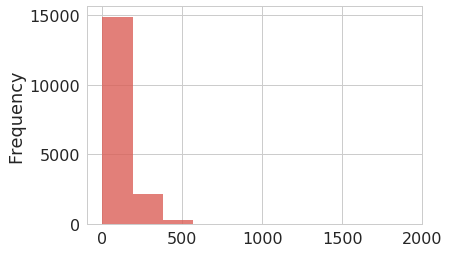

In [49]:
lengths.plot.hist(alpha=0.8)

That's interesting if we devide sizes by $160$ and count how many text messages are just 1 message or more. Average message length is $70\%$ of one message.

In [50]:
(lengths / 160).round().describe()

count    17398.000000
mean         0.597080
std          0.714668
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         12.000000
dtype: float64

And if we restrict to the [reasonably-sized SMS](https://en.wikipedia.org/wiki/SMS#Message_size), we see that most of them fit in less than 160 caracters.

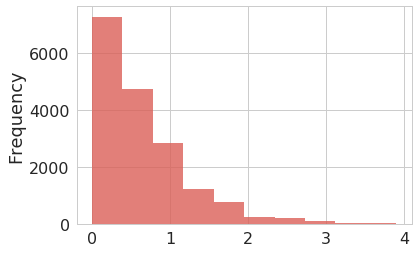

In [51]:
(lengths[lengths <= 4*160] / 160).plot.hist(alpha=0.8)

Most messages fit in one message, and most of them fit in $30\%$ of 160 caracters:

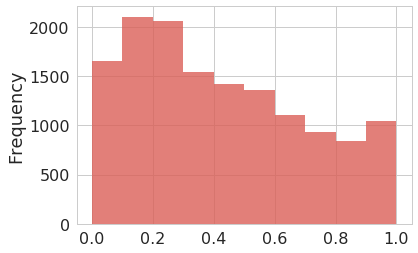

In [52]:
(lengths[lengths <= 160] / 160).plot.hist(alpha=0.8)

Do I send longer messages than the ones I receive?

In [53]:
sent_lengths.describe()
received_lengths.describe()

count    9858.000000
mean      115.493406
std        89.214690
min         1.000000
25%        48.000000
50%        96.000000
75%       157.000000
max       459.000000
dtype: float64

count    7540.000000
mean       88.657294
std        99.124712
min         0.000000
25%        27.000000
50%        57.000000
75%       118.000000
max      1903.000000
dtype: float64

To make it more visual, here is the histogram plots of non-MMS text messages I received and sent in the last two years:

Text(0.5,0,'Size of SMS')

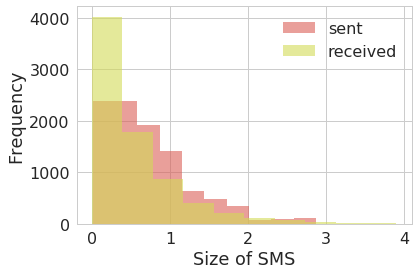

In [54]:
(sent_lengths[sent_lengths <= 4*160] / 160).plot.hist(alpha=0.6, label="sent")
(received_lengths[received_lengths <= 4*160] / 160).plot.hist(alpha=0.6, label="received")
plt.legend()
plt.xlabel("Size of SMS")

In [55]:
#plt.savefig("images/size_of_sms_sent_vs_received.png")

### Q3. Mean, min, max number of text message everyday?

To answer this, I will need to cluster the data on a daily basis.

It shouldn't be too hard to do, by adding a "day" column, based on the "time" column.

In [56]:
df[:5]

address                                               body  \
0  0669612XXX                                      Si tu veux :)   
1  0669612XXX                                 Jeudi soir sinon ?   
2  0669612XXX  Hmm je commence tôt samedi alors faut juste pa...   
3  0674706XXX                              Tabernacle c'est long   
4  0669612XXX    Bien aussi :-) ! Vendredi soir ce serait cool !   

            date name read service_center                    time type  
0  1516725248997         1   +33695000660  23 janv. 2018 17:34:08    1  
1  1516723690247         1                 23 janv. 2018 17:08:10    2  
2  1516723430046         1   +33695000660  23 janv. 2018 17:03:50    1  
3  1516722687350         1                 23 janv. 2018 16:51:27    2  
4  1516722584609         1                 23 janv. 2018 16:49:44    2

In [57]:
from datetime import date

In [58]:
def day_of_date(d):
    timestamp = int(d)/1000
    this_d = date.fromtimestamp(timestamp)
    return (this_d.day, this_d.month, this_d.year)

In [59]:
df.date[:1]

0    1516725248997
Name: date, dtype: object

In [60]:
day_of_date('1536725248997')

(12, 9, 2018)

Now, we can create a "day" attribute pretty easily:

In [61]:
df['day'] = df.date.apply(day_of_date)

In [62]:
df[:1]

address           body           date name read service_center  \
0  0669612XXX  Si tu veux :)  1516725248997         1   +33695000660   

                     time type            day  
0  23 janv. 2018 17:34:08    1  (23, 1, 2018)

And then we can group the data by "day".

- What is the day when I exchanged the most text messages:

In [63]:
df.groupby(['day']).body.count().sort_values(ascending=False)[:10]

day
(22, 7, 2017)     143
(30, 8, 2016)     132
(13, 1, 2018)     127
(16, 12, 2016)    120
(23, 7, 2017)     115
(30, 12, 2017)    113
(4, 4, 2016)      104
(8, 5, 2017)       99
(24, 5, 2017)      92
(2, 12, 2016)      89
Name: body, dtype: int64

- With who?

In [64]:
df.groupby(['day', 'address', 'name']).body.count().sort_values(ascending=False)[:10]

day             address     name
(22, 7, 2017)   0683480XXX  LS      93
(23, 7, 2017)   0683480XXX  LS      68
(7, 7, 2017)    0670933XXX  PB      51
(30, 8, 2016)   0670933XXX  PB      46
(31, 3, 2017)   0670933XXX  PB      46
(16, 12, 2016)  0670933XXX  PB      43
(8, 5, 2017)    0652222XXX  RD      43
(16, 11, 2016)  0670933XXX  PB      43
(23, 6, 2017)   0670933XXX  PB      43
(27, 1, 2017)   0670933XXX  PB      38
Name: body, dtype: int64

- Mean, min, max number of text message everyday?

In average, for each of my contact, and every day, I exchange about $4.4$ messages.
Maximum is a day in July where I exchanged a lot with LS (see above)

In [65]:
df.groupby(['day', 'address', 'name']).body.count().describe()

count    3932.000000
mean        4.424720
std         5.129132
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        93.000000
Name: body, dtype: float64

In average, I exchange about $27$ message everyday. What about the difference between sent and received message?

In [66]:
df.groupby(['day']).body.count().describe()

count    632.000000
mean      27.528481
std       22.476171
min        1.000000
25%       10.000000
50%       23.000000
75%       40.000000
max      143.000000
Name: body, dtype: float64

In [67]:
received = df[df.type == '1']
sent = df[df.type == '2']

I send in average $15$ messages and receive $12$ everyday.

Extreme values for both follow the same distribution, that's very logical: a day when I send a lot can only be a day when I receive a lot!

In [68]:
sent.groupby(['day']).body.count().describe()

count    622.000000
mean      15.848875
std       12.789501
min        1.000000
25%        6.000000
50%       13.000000
75%       23.000000
max       73.000000
Name: body, dtype: float64

In [69]:
received.groupby(['day']).body.count().describe()

count    619.000000
mean      12.180937
std        9.993666
min        1.000000
25%        4.000000
50%       10.000000
75%       18.000000
max       71.000000
Name: body, dtype: float64

### Q5. Is there a day in the week (or a month in the year) where I receive more text messages? And an hour in the day?

To answer this, I need to group by the data by weekday or by month.

In [70]:
df.date[:1]

0    1516725248997
Name: date, dtype: object

In [71]:
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

def weekday_of_date(d):
    timestamp = int(d)/1000
    this_d = date.fromtimestamp(timestamp)
    return weekdays[this_d.weekday()]

In [72]:
def weekend_of_date(d):
    timestamp = int(d)/1000
    this_d = date.fromtimestamp(timestamp)
    if this_d.weekday() >= 5:
        return "weekend"
    else:
        return "week"

In [73]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

def month_of_date(d):
    timestamp = int(d)/1000
    this_d = date.fromtimestamp(timestamp)
    return months[this_d.month - 1]

In [74]:
weekday_of_date('1536725248997')
weekend_of_date('1536725248997')
month_of_date('1536725248997')

'Wednesday'

'week'

'Sep'

I also want to group the text messages by hours or minutes.

In [75]:
df.time[:1]

0    23 janv. 2018 17:34:08
Name: time, dtype: object

In [76]:
def hour_of_time(t):
    return t[-8:-6]

def minute_of_time(t):
    return t[-5:-3]

In [77]:
t = '23 janv. 2018 17:34:08'
hour_of_time(t)
minute_of_time(t)

'17'

'34'

Now, we can create attributes for "weekday", "month" and "weekend" pretty easily:

In [78]:
df['weekday'] = df.date.apply(weekday_of_date)
df['weekend'] = df.date.apply(weekend_of_date)
df['month'] = df.date.apply(month_of_date)

In [79]:
df['hour'] = df.time.apply(hour_of_time)
df['minute'] = df.time.apply(minute_of_time)

Let's just check:

In [80]:
df[:1]

address           body           date name read service_center  \
0  0669612XXX  Si tu veux :)  1516725248997         1   +33695000660   

                     time type            day  weekday weekend month hour  \
0  23 janv. 2018 17:34:08    1  (23, 1, 2018)  Tuesday    week   Jan   17   

  minute  
0     34

In [81]:
df[-1:]

address                                               body  \
17397  0676962XXX  Salut et joyeuses Pâques à toi aussi ! Pour ré...   

                date name read service_center                   time type  \
17397  1459187172778   BC    1   +33695000660  28 mars 2016 19:46:12    1   

                 day weekday weekend month hour minute  
17397  (28, 3, 2016)  Monday    week   Mar   19     46

Now, I can see that I don't text a lot in the beginning of the work week, and I'm mostly active on weekeds and Friday. That's a very natural result!

In [82]:
df.groupby(['weekday']).body.count().sort_values(ascending=False)

weekday
Saturday     2914
Friday       2884
Sunday       2755
Thursday     2348
Wednesday    2291
Tuesday      2161
Monday       2045
Name: body, dtype: int64

In [83]:
weekends = df.groupby(['weekend']).body.count().sort_values(ascending=False)
weekends["week"] /= 5
weekends["weekend"] /= 2
weekends

weekend
week       2345
weekend    2834
Name: body, dtype: int64

Text(0.5,1,'Proportionally, I send more messages\nin 2 days of weekends than 5 days of the week')

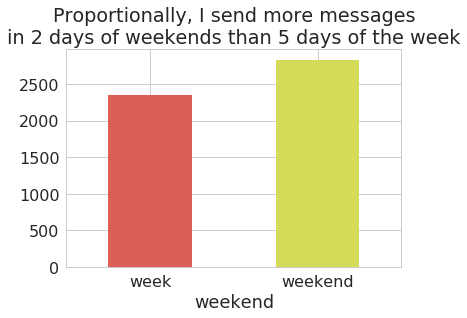

In [84]:
weekends.plot.bar(rot=0)
plt.title("Proportionally, I send more messages\nin 2 days of weekends than 5 days of the week")

In [85]:
#plt.savefig("images/week_vs_weekend.png")

Let's visualize a little bit more:

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

Text(0.5,1,'Repartition of text message by weekday')

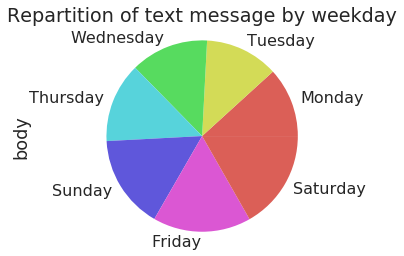

In [86]:
plt.axis('equal')
r = df.groupby(['weekday']).body.count().sort_values()
r.plot.pie(radius=1.1)
plt.title("Repartition of text message by weekday")

In [87]:
#plt.savefig("images/messages_by_weekday_1.png")

Text(0.5,1,'Repartition of text messages by weekday\nInterpretation: I socialize more during the weekend!!')

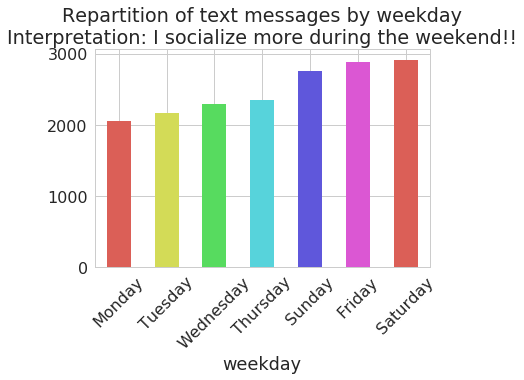

In [88]:
r = df.groupby(['weekday']).body.count().sort_values()
r.plot.bar(rot=45)
plt.title("Repartition of text messages by weekday\nInterpretation: I socialize more during the weekend!!")

In [89]:
#plt.savefig("images/messages_by_weekday_2.png")

And by month? There is clearly more in September, December and January:

- I would explain September with the coming back from holidays and lots of paperwork and news about friends,
- December is obviously explained by the holidays, Christmas and the New Year's Eve,
- January also has more messages than the average, because of the Happy New Year's wishes and my birthday, I guess...
- February has the smallest count, not because it is shorted but usually I work a lot and don't do much social things in February (no holidays, no birthday etc).

In [90]:
df.groupby(['month']).body.count().sort_values(ascending=False)

month
Sep    2214
Dec    2029
Jan    1865
Nov    1580
Oct    1520
Aug    1506
Jun    1422
Jul    1345
Apr    1125
May    1104
Mar    1066
Feb     622
Name: body, dtype: int64

In [91]:
monthnum_of_month = {m: i for i, m in enumerate(months)}

def lambda_monthnum_of_month(m):
    return monthnum_of_month[m]

In [92]:
monthnums = [lambda_monthnum_of_month(m) for m in months]
monthnums

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [93]:
df['monthnum'] = df.month.apply(lambda_monthnum_of_month)

In [94]:
key = df['month'].map(monthnum_of_month)

In [95]:
r.get_values()

array([2045, 2161, 2291, 2348, 2755, 2884, 2914])

<Container object of 12 artists>

Text(0.5,1,'Repartition of text messages by month\nInterpretation: I socialize more for Christmas and in September')

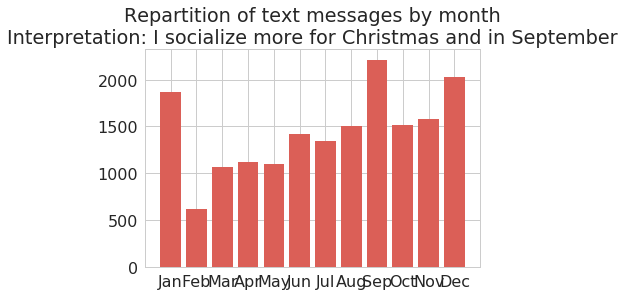

In [102]:
r = df.iloc[key.argsort()].groupby(['monthnum', 'month']).body.count()
plt.bar(monthnums, r.get_values(), tick_label=months)
plt.title("Repartition of text messages by month\nInterpretation: I socialize more for Christmas and in September")

In [97]:
#plt.savefig("images/messages_by_month.png")

- By hour now?

In [98]:
df.groupby(['hour']).body.count().sort_values(ascending=False)

hour
19    1749
20    1452
18    1425
21    1159
22    1142
11    1124
12    1051
17    1037
10     996
13     952
09     906
16     885
15     809
14     787
23     774
08     630
00     275
07     127
01      71
02      23
06      11
05       6
04       4
03       3
Name: body, dtype: int64

([<matplotlib.axis.XTick at 0x7f00afd99198>,
 <a list of 11 Text xticklabel objects>)

Text(0.5,1,'Repartition of text messages by hours in a day\nInterpretation: I mainly text in the evenings aroung 19 P.M.')

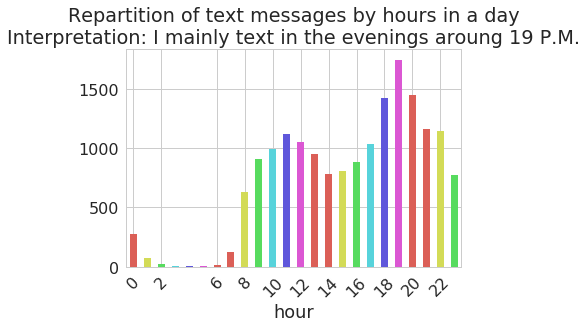

In [105]:
r = df.groupby(['hour']).body.count()
r.plot.bar(rot=45)
hours_to_see = [0, 2, 6, 8, 10, 12, 14, 16, 18, 20, 22]
plt.xticks(hours_to_see, hours_to_see)
plt.title("Repartition of text messages by hours in a day\nInterpretation: I mainly text in the evenings aroung 19 P.M.")

In [108]:
#plt.savefig("images/messages_by_hour.png")

## Conclusion

I don't see other interesting questions I can ask to this database, so I will stop here.

That's it for today! *See you, folks!*

> See [here for other notebooks](https://github.com/Naereen/notebooks/) I wrote.